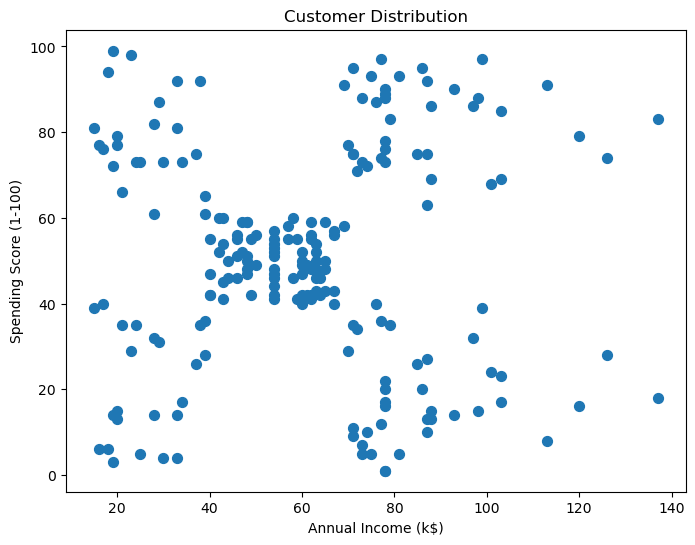

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

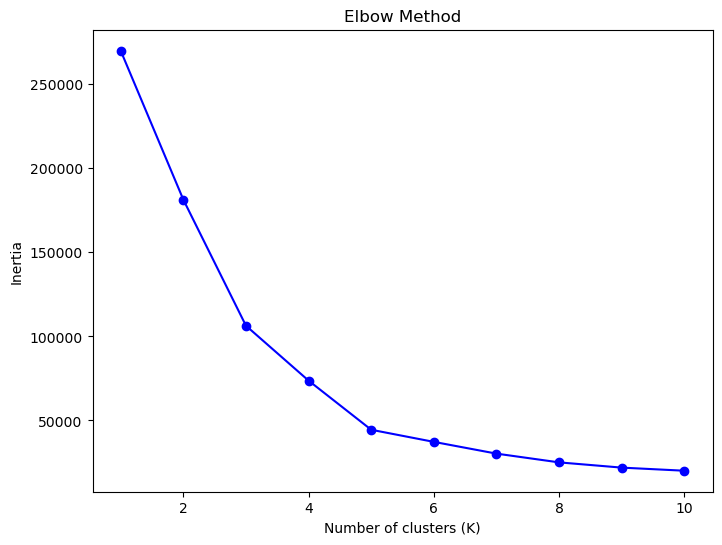

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


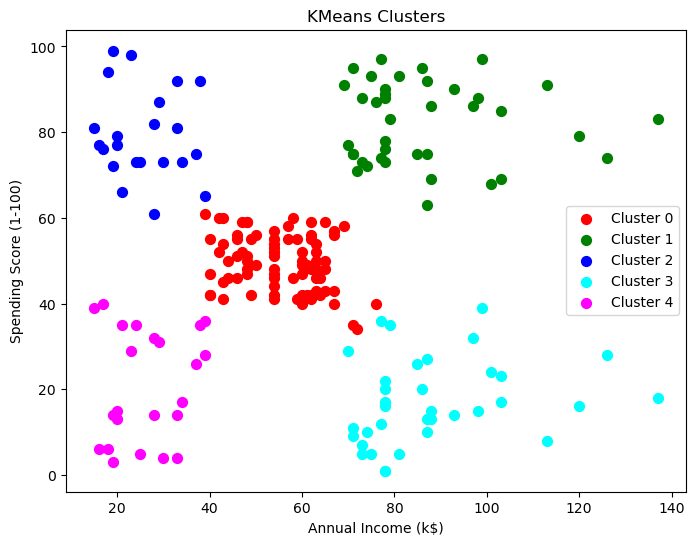

Silhouette Score: 0.554


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import os

# ✅ Specify your file path — CHANGE this to your actual path
file_path = r'C:\Users\shivain/Mall_Customers.csv'

# ✅ Check if file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found at: {file_path}")

# ✅ Load dataset
df = pd.read_csv(file_path)

# ✅ Select features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# ✅ Plot raw data
plt.figure(figsize=(8, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Distribution')
plt.show()

# ✅ Elbow method
inertia = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(X)
    inertia.append(model.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# ✅ KMeans clustering
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

# ✅ Visualize clusters
colors = ['red', 'green', 'blue', 'cyan', 'magenta']
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    data = df[df['Cluster'] == cluster]
    plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'],
                s=50, c=colors[cluster], label=f'Cluster {cluster}')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.title('KMeans Clusters')
plt.show()

# ✅ Silhouette score
score = silhouette_score(X, df['Cluster'])
print(f'Silhouette Score: {score:.3f}')
